In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Fri, 10 Jun 2022 10:36


In [3]:
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../../outputs'

# Commute Mode by Workplace Geography

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))

# Add mode share by work_place field
_df = df.groupby('work_place').sum()[['modeled','observed']].reset_index()
_df = _df.merge(df, on='work_place', suffixes=['_geog_total','_mode_total'])
_df['observed_mode_share'] = _df['observed_mode_total']/_df['observed_geog_total']
_df['modeled_mode_share'] = _df['modeled_mode_total']/_df['modeled_geog_total']
_df[['work_place','mode','modeled_mode_total','observed_mode_total','percent_diff','diff','modeled_mode_share','observed_mode_share']]

,work_place,mode,modeled_mode_total,observed_mode_total,percent_diff,diff,modeled_mode_share,observed_mode_share
0,Auburn,auto,"37,285.00",33431,0.12,"3,854.00",0.95,0.94
1,Auburn,transit,"1,305.00",691,0.89,614.00,0.03,0.02
2,Auburn,walk_and_bike,666.00,1355,-0.51,-689.00,0.02,0.04
3,Bellevue,auto,"103,267.00",96761,0.07,"6,506.00",0.89,0.84
4,Bellevue,transit,"6,790.00",12505,-0.46,"-5,715.00",0.06,0.11
5,Bellevue,walk_and_bike,"6,388.00",6464,-0.01,-76.00,0.05,0.06
6,Everett,auto,"61,898.00",81741,-0.24,"-19,843.00",0.94,0.92
7,Everett,transit,"1,476.00",2766,-0.47,"-1,290.00",0.02,0.03
8,Everett,walk_and_bike,"2,483.00",3961,-0.37,"-1,478.00",0.04,0.04
9,Federal Way,auto,"21,312.00",27590,-0.23,"-6,278.00",0.94,0.93


r^2 : 0.9539785291300426


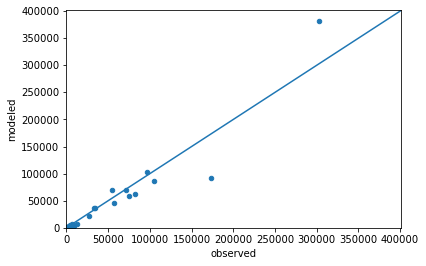

In [5]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Commute Mode Shares by Work Place
----

In [6]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [7]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.95,0.94,auto,0.01,0.01
3,Bellevue,0.89,0.84,auto,0.06,0.05
6,Everett,0.94,0.92,auto,0.02,0.02
9,Federal Way,0.94,0.93,auto,0.00,0.00
12,Kent,0.95,0.92,auto,0.02,0.02
15,Kirkland,0.94,0.87,auto,0.09,0.07
18,Redmond,0.93,0.85,auto,0.10,0.08
21,Renton,0.93,0.91,auto,0.03,0.03
24,Seattle,0.72,0.55,auto,0.31,0.17
27,Tacoma,0.92,0.94,auto,-0.01,-0.01


r^2 : 0.9674402547174963


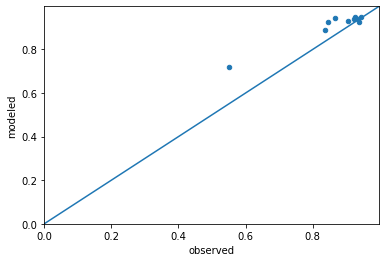

In [8]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print('r^2 : ' + str(r_value))

## Transit

In [9]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.03,0.02,transit,0.71,0.01
4,Bellevue,0.06,0.11,transit,-0.46,-0.05
7,Everett,0.02,0.03,transit,-0.28,-0.01
10,Federal Way,0.03,0.00,transit,7.59,0.03
13,Kent,0.04,0.05,transit,-0.15,-0.01
16,Kirkland,0.03,0.09,transit,-0.69,-0.06
19,Redmond,0.05,0.11,transit,-0.56,-0.06
22,Renton,0.05,0.04,transit,0.10,0.00
25,Seattle,0.17,0.32,transit,-0.46,-0.14
28,Tacoma,0.03,0.03,transit,-0.10,-0.00


r^2 : 0.9470571426887924


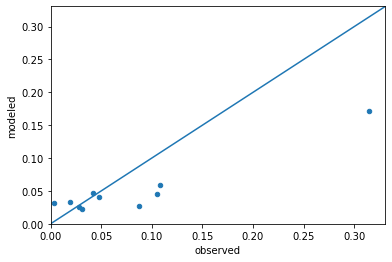

In [10]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print('r^2 : ' + str(r_value))

## Walk and Bike

In [11]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.02,0.04,walk_and_bike,-0.56,-0.02
5,Bellevue,0.05,0.06,walk_and_bike,-0.02,-0.00
8,Everett,0.04,0.04,walk_and_bike,-0.16,-0.01
11,Federal Way,0.03,0.06,walk_and_bike,-0.52,-0.03
14,Kent,0.01,0.03,walk_and_bike,-0.54,-0.01
17,Kirkland,0.03,0.05,walk_and_bike,-0.31,-0.01
20,Redmond,0.03,0.05,walk_and_bike,-0.45,-0.02
23,Renton,0.02,0.05,walk_and_bike,-0.58,-0.03
26,Seattle,0.11,0.14,walk_and_bike,-0.19,-0.03
29,Tacoma,0.05,0.03,walk_and_bike,0.46,0.02


r^2 : 0.8734413625912709


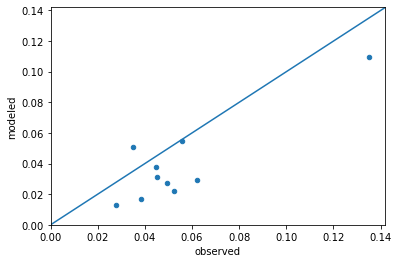

In [12]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print('r^2 : ' + str(r_value))

# Commute Mode Share by Home Tract
----

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
pd.options.display.float_format = '{:0,.0f}'.format

In [31]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_total = df[['modeled','observed']].assign(CountyName='Total').groupby('CountyName').sum().reset_index()
pd.concat([df_county, df_total], ignore_index=True)

,CountyName,modeled,observed
0,King,"1,130,364","1,021,603"
1,Kitsap,"79,313","105,763"
2,Pierce,"234,401","364,096"
3,Snohomish,"205,136","351,318"
4,Total,"1,649,214","1,842,780"


In [39]:
df_county['CountyGroup'] = np.where(df_county['CountyName']=='Pierce','Pierce','Other')
df_pierce = df_county.groupby('CountyGroup').sum()[['modeled', 'observed']].reset_index()
df_pierce

,CountyGroup,modeled,observed
0,Other,"1,414,813","1,478,684"
1,Pierce,"234,401","364,096"


In [40]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [41]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

## SOV

 r^2: 0.632593984207109


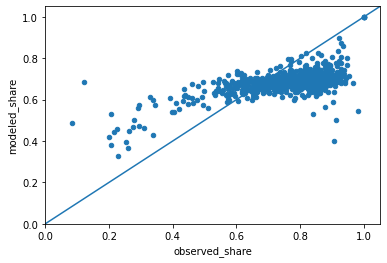

In [42]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## HOV

 r^2: 0.15118404116488107


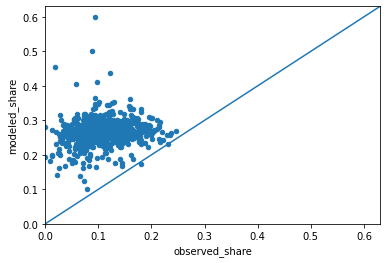

In [43]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Transit

 r^2: 0.5963531416563294


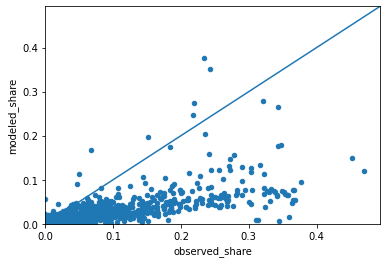

In [44]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Walk

 r^2: 0.7379919870887436


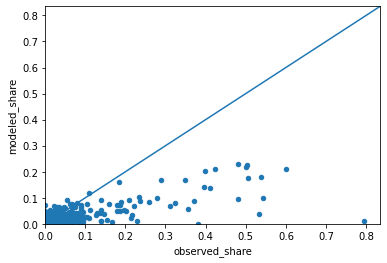

In [45]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

# Commute Mode Share by Home Tract - Pierce County

In [47]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
df = df[df['CountyName'] == 'Pierce']

df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

In [48]:
df_county_mode

,CountyName,mode,modeled,observed,modeled_total,observed_total,modeled_share,observed_share
0,Pierce,HOV,65438,38125,234401,364096,27.92%,10.47%
1,Pierce,SOV,159679,307529,234401,364096,68.12%,84.46%
2,Pierce,Transit,4403,12237,234401,364096,1.88%,3.36%
3,Pierce,Walk,4881,6205,234401,364096,2.08%,1.70%


## SOV

 r^2: 0.31710442509952447


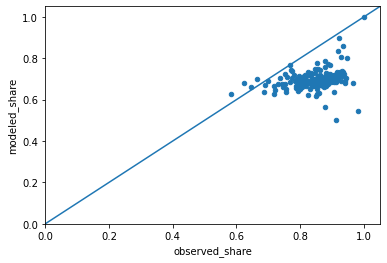

In [49]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## HOV

 r^2: 0.08190842222387167


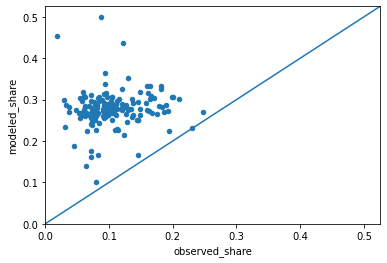

In [50]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Transit

 r^2: 0.24022754810414063


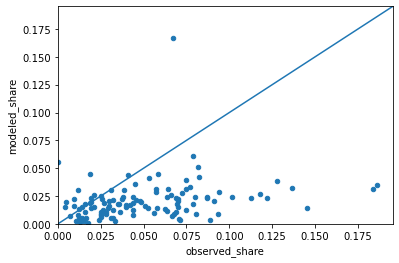

In [51]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Walk

 r^2: 0.30045588006303625


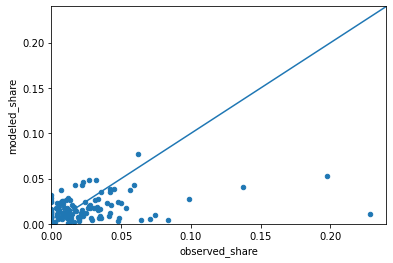

In [52]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

# Commute Mode Share by Home Tract - Other Counties

In [53]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
df = df[df['CountyName'] != 'Pierce']

df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

In [54]:
df_county_mode

,CountyName,mode,modeled,observed,modeled_total,observed_total,modeled_share,observed_share
0,King,HOV,270228,105734,1130364,1021603,23.91%,10.35%
1,King,SOV,683255,706557,1130364,1021603,60.45%,69.16%
2,King,Transit,118031,148985,1130364,1021603,10.44%,14.58%
3,King,Walk,58850,60327,1130364,1021603,5.21%,5.91%
4,Kitsap,HOV,21441,9400,79313,105763,27.03%,8.89%
5,Kitsap,SOV,54743,81227,79313,105763,69.02%,76.80%
6,Kitsap,Transit,1077,9327,79313,105763,1.36%,8.82%
7,Kitsap,Walk,2052,5809,79313,105763,2.59%,5.49%
8,Snohomish,HOV,56723,44150,205136,351318,27.65%,12.57%
9,Snohomish,SOV,141070,281848,205136,351318,68.77%,80.23%


## SOV

 r^2: 0.6759558531364793


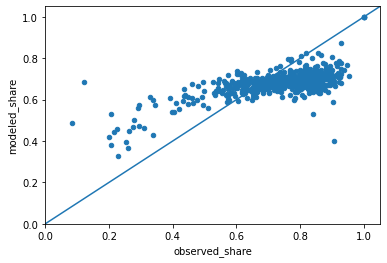

In [55]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## HOV

 r^2: 0.1847941755038506


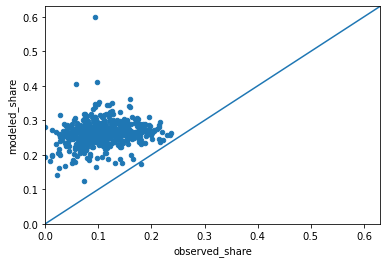

In [56]:
# Show only HOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Transit

 r^2: 0.589753163070952


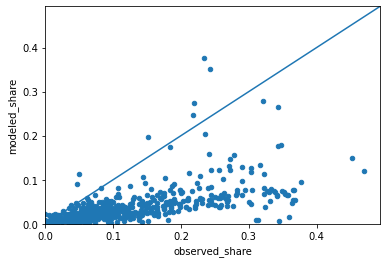

In [57]:
# Show only Transit
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))

## Walk

 r^2: 0.748568462361662


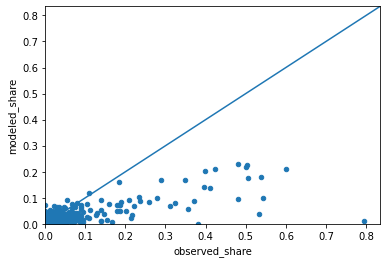

In [58]:
# Show only Walk
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print(' r^2: ' + str(r_value))